## Q1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\samir\OneDrive\Documents\10-2022 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
# Checking dataframe
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 33)

## Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

#### This is PII present wiithin the data set, first and last names of customers. While I will make a note of it within the final report I will not remove this information because it was not specified within the project brief to do so.

## Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

#### Create a “Region” column based on the “State” column from your customers data set

In [6]:
# Creating region lists
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [7]:
# Creating regional flag column

df.loc[df['state'].isin(northeast), 'region']='Northeast'
df.loc[df['state'].isin(midwest), 'region']='Midwest'
df.loc[df['state'].isin(south), 'region']='South'
df.loc[df['state'].isin(west), 'region']='West'

In [8]:
# Checking length of new column
len(df['region'])

32404859

In [9]:
# Checking frequency
df['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#### Determine whether there’s a difference in spending habits between the different U.S. regions

In [10]:
# Creating a crosstab to compare region and spending flag
crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [11]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### This regions with the most amount of highest spenders are the South and the Midwest. Likewise, the regiongs with the most amount f low spenders are the South and the West. The Northeast has both the lowest amount of high spenders and low spenders,

## Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

#### Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [12]:
# Creating exclusion flag column
df.loc[df['max_order']>=5, 'activity']='normal'
df.loc[df['max_order']<5, 'activity']='low'

In [13]:
# Checking new column frequency
df['activity'].value_counts(dropna=False)

normal    30964564
low        1440295
Name: activity, dtype: int64

In [14]:
# Checking new column length
len(df['activity'])

32404859

#### Exclude them from the data. Make sure you export this sample.

In [15]:
# Creating a dataframe of customers with orders lower than 5
df_low = df[df['activity']=='low']

In [16]:
# Checking dataframe
df_low.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Rich,Female,Kentucky,54,3/2/2017,2,married,99219,South,low


In [17]:
df_low['activity'].value_counts(dropna=False)

low    1440295
Name: activity, dtype: int64

In [18]:
df_low.shape

(1440295, 35)

In [19]:
# Exporting df_low
df_low.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [20]:
# Creating a dataframe of customers with normal activity
df2 = df[df['activity']=='normal']

In [21]:
# Checking dataframe
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal


In [22]:
df2.shape

(30964564, 35)

In [23]:
df2['activity'].value_counts(dropna=False)

normal    30964564
Name: activity, dtype: int64

In [24]:
# Confirming dataframes make length of original
len(df_low) + len(df2)

32404859

In [25]:
# Deleting other dataframes to reduce memory usage
del df

In [26]:
del df_low

## Q5-Q7.  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. Create an appropriate visualization to show the distribution of profiles, & ggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

### Age Profile

In [27]:
# Creating age flag column
df2.loc[df2['age']<=25, 'age_group']='Young Adult'
df2.loc[(df2['age']<65)&(df2['age']>25), 'age_group']='Adult'
df2.loc[df2['age']>=65, 'age_group']='Senior'

In [28]:
# Checking new column
df2['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [29]:
# Aggregate for age group usage frequency
df2.groupby('age_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
age_group                                    
Adult                     9.971613  0.0  30.0
Senior                    9.933025  0.0  30.0
Young Adult               9.937482  0.0  30.0

In [30]:
# Aggregate for age group expenditure
df2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Adult        7.789100  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784889  1.0  25.0

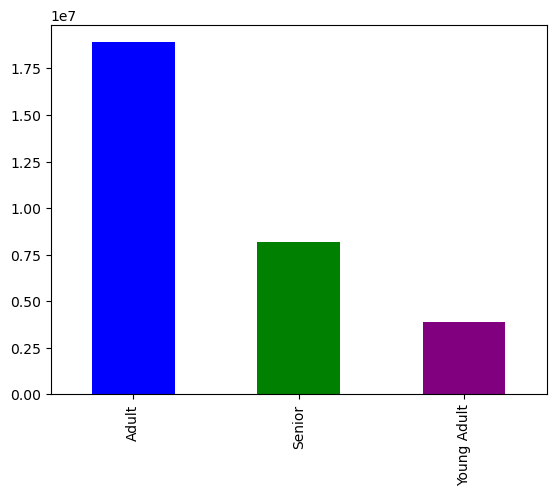

In [31]:
# Age profile visualization
bar=df2['age_group'].value_counts().plot.bar(color =['blue', 'green', 'purple'])

In [32]:
# Export Bar Chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_agegroup.png'))

### Income Profile

In [33]:
# Create income flag profile
df2.loc[df2['income']<40000, 'income_group']='low income'
df2.loc[(df2['income']>=40000)&(df2['income']<150000), 'income_group']='middle income'
df2.loc[df2['income']>150000, 'income_group']='high income'

In [34]:
# Checking new column
df2['income_group'].value_counts()

middle income    25457264
high income       3894534
low income        1612025
Name: income_group, dtype: int64

In [35]:
# Aggregate for income group order frequency
df2.groupby('income_group').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                mean  min   max
income_group                                   
high income                 9.789454  0.0  30.0
low income                 10.651766  0.0  30.0
middle income               9.938805  0.0  30.0

In [36]:
# Aggregate for income group expenditure
df2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.940855  1.0  25.0
low income     6.502895  1.0  25.0
middle income  7.849178  1.0  25.0

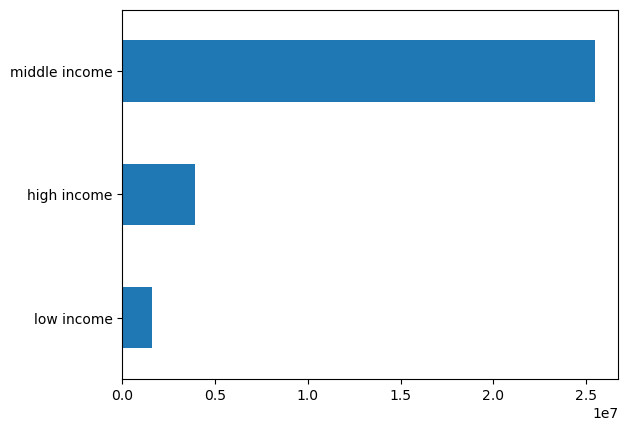

In [37]:
# Income profile visualization
bar2 = df2['income_group'].value_counts().sort_values().plot.barh()

In [38]:
# Export Bar Chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomegroup.png'))

### Department ID profile

In [39]:
# Importing departments dataframe
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [40]:
# Checking Dataframe
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [41]:
# Renaming unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [42]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
# Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [44]:
# Connect department names to department_id in dataframe
df2['department'] = df2['department_id'].map(data_dict)

In [45]:
# Checking dataframe
df2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,no_of_dependents,marital_status,income,region,activity,age_group,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,normal,Adult,middle income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,normal,Adult,middle income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,normal,Adult,middle income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,normal,Adult,middle income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,normal,Adult,middle income,beverages


#### Department - Baby Profile

In [46]:
# Creating baby department flag column
df2['baby_status'] = [1 if x == 'babies' else 0 for x in df2['department']]
df2['baby_status'] = df2.groupby(['user_id'])['baby_status'].transform(np.max)

In [47]:
# Checking column
df2['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [48]:
# Aggregatefor baby status bracket order frequency
df2.groupby('baby_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                              mean  min   max
baby_status                                  
0                        10.731215  0.0  30.0
1                         8.287965  0.0  30.0

In [49]:
# Aggregate for baby status bracket expenditure
df2.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.770758  1.0  25.0
1            7.833353  1.0  25.0

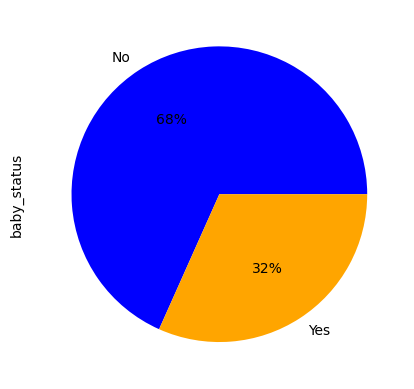

In [50]:
# Baby Status Visualization
pie = df2['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['blue','orange'])

In [51]:
# Export pie chart
pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pei_babystatus.png'))

#### Department - Alcohol Profile

In [52]:
# Creating alcohol flag column 
df2['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df2['department']]
df2['alcohol_status'] = df2.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [53]:
# Checking Column
df2['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [54]:
# Aggregate for alcohol status bracket order frequency
df2.groupby('alcohol_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                                 mean  min   max
alcohol_status                                  
0                            9.977038  0.0  30.0
1                            9.712661  0.0  30.0

In [55]:
# Aggregate for alcohol_ tatus bracket expenditure
df2.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.791490  1.0  25.0
1               7.779533  1.0  25.0

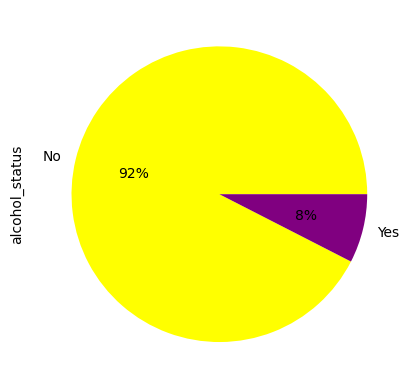

In [56]:
# Alcohol status visualization
pie2 = df2['alcohol_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['yellow','purple'])

In [57]:
# Export alcohol status pie chart
pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcoholstatus.png'))

#### Department - Pet Profile

In [58]:
#Creating pet flag: bought pet supplies(1)/didn't buy pet supplies (0). 
df2['pet_status'] = [1 if x == 'pets' else 0 for x in df2['department']]
df2['pet_status']=df2.groupby(['user_id'])['pet_status'].transform(np.max)

In [59]:
# Checking column
df2['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [60]:
#Aggregating for pet_status bracket order frequency
df2.groupby('pet_status').agg({'median_order_frequency': ['mean', 'min', 'max']})

median_order_frequency           
                             mean  min   max
pet_status                                  
0                       10.052380  0.0  30.0
1                        9.197913  0.0  30.0

In [61]:
#Aggregating for pet_status bracket expenditure
df2.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.787939  1.0  25.0
1           7.811730  1.0  25.0

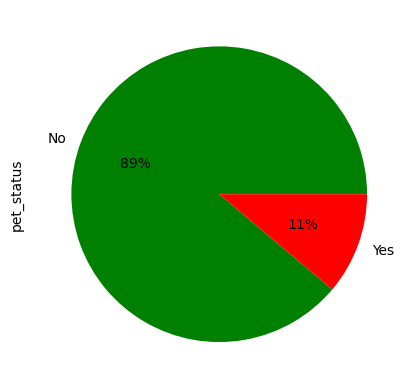

In [62]:
# Pet Status Visualization
pie3 = df2['pet_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['green','red'])

In [63]:
# Export Pet Status Pie Chart
pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_petstatus.png'))

## Q8. Compare your customer profiles with regions and departments.

In [64]:
# Creating crosstab for region and age group
age_region = pd.crosstab(df2['region'], df2['age_group'], dropna = False)

In [65]:
# Checking crosstab
age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,4459312,1904046,898155
Northeast,3299969,1484807,679909
South,6287689,2708461,1314989
West,4857532,2098230,971465


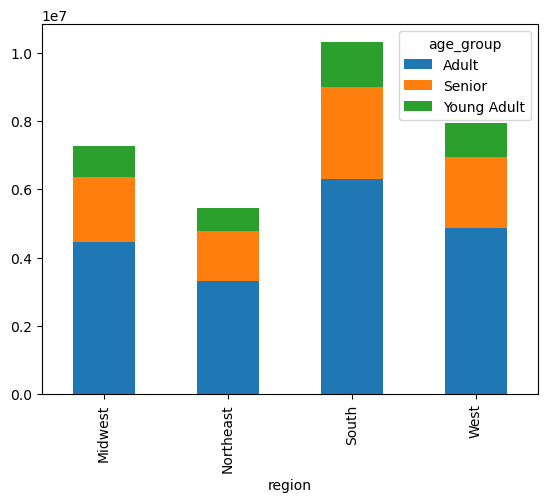

In [66]:
# Age Region Bar Chart
bar3 = age_region.plot(kind='bar', stacked =True)

In [67]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [68]:
# Creating crosstab for region and income
region_income = pd.crosstab(df2['region'], df2['income_group'], dropna = False)

In [69]:
# Checking crosstab
region_income

income_group,high income,low income,middle income
region,,,
Midwest,916961,373583,5970435
Northeast,677680,283124,4503831
South,1290303,552104,8468575
West,1009590,403214,6514423


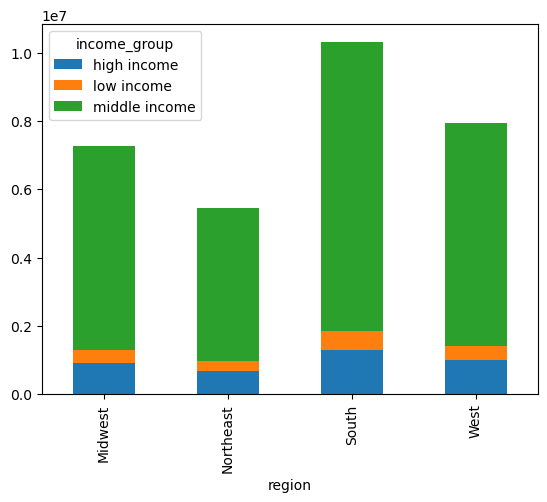

In [70]:
# Income region bar chart
bar4 = region_income.plot(kind='bar', stacked =True)

In [71]:
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income.png'))

In [72]:
# Creating crosstab for region and department
region_dep = pd.crosstab(df2['department'], df2['region'], dropna = False)

In [73]:
# Checking Crosstab
region_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


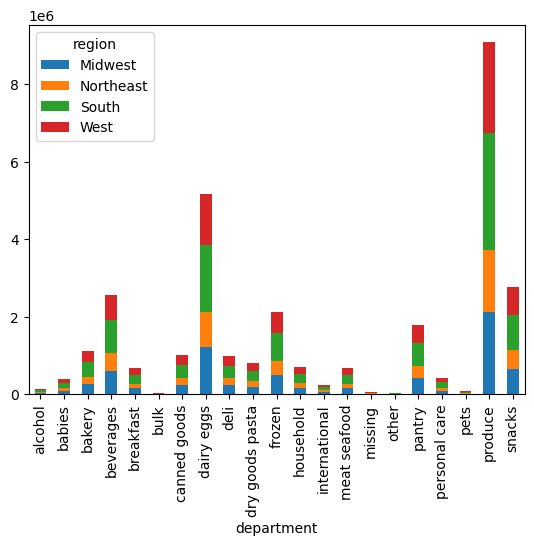

In [74]:
# Region Department Bar Chart
bar5 = region_dep.plot(kind='bar', stacked =True)

In [75]:
# Exporting bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

In [76]:
# Creating crosstab for region and department
region_pricerange = pd.crosstab(df2['region'], df2['price_range_loc'], dropna = False)

In [77]:
# Checiking crosstab
region_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


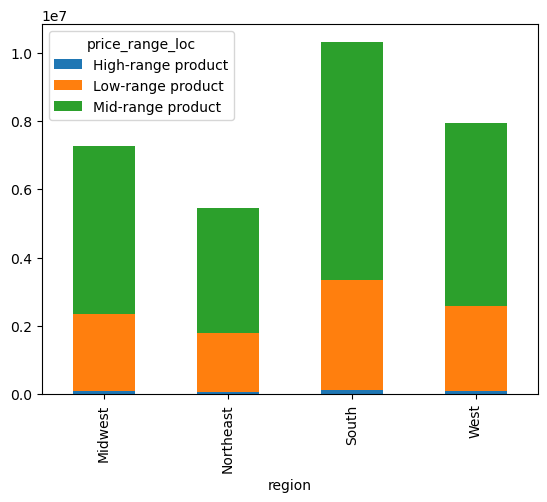

In [78]:
# Region Price Range Bar Chart
bar6 = region_pricerange.plot(kind='bar', stacked =True)

In [79]:
# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

In [80]:
# Creating crosstab for income and frequency
income_freq = pd.crosstab(df2['income_group'], df2['order_frequency_flag'], dropna = False)

In [81]:
# Checking crosstab
income_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
high income,2699671,345242,849621
low income,1038996,184500,388529
middle income,17465275,2365183,5626806


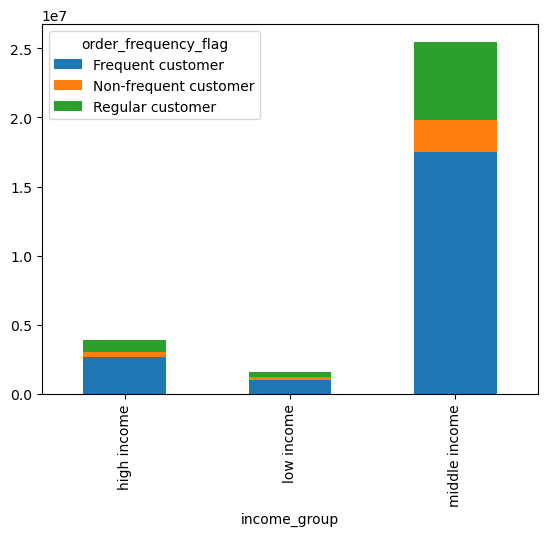

In [82]:
# Income Group and Order frequency Bar Chart
bar7 = income_freq.plot(kind='bar', stacked =True)

In [83]:
# Exporting bar chart
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

In [84]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(df2['age_group'], df2['order_frequency_flag'], dropna = False)

In [85]:
# Checiking crosstab
age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,12919571,1776404,4208527
Senior,5630976,760132,1804436
Young Adult,2653929,358439,852150


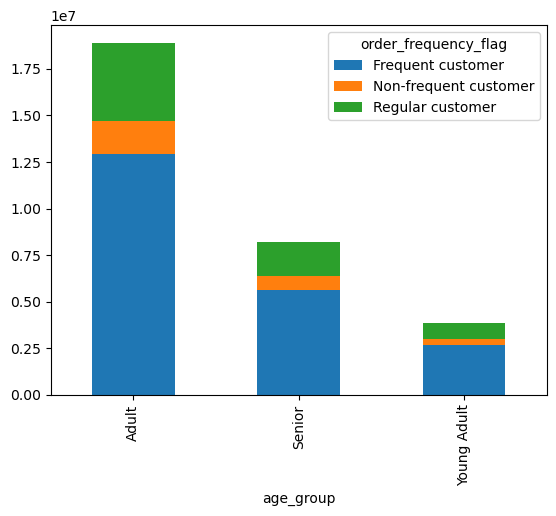

In [86]:
# Region Price Range Bar Chart
bar8 = age_freq.plot(kind='bar', stacked =True)

In [87]:
# Exporting bar chart
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [88]:
# Creating crosstab for age and frequency
marital_freq = pd.crosstab(df2['marital_status'], df2['order_frequency_flag'], dropna = False)

In [89]:
# Checiking crosstab
marital_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


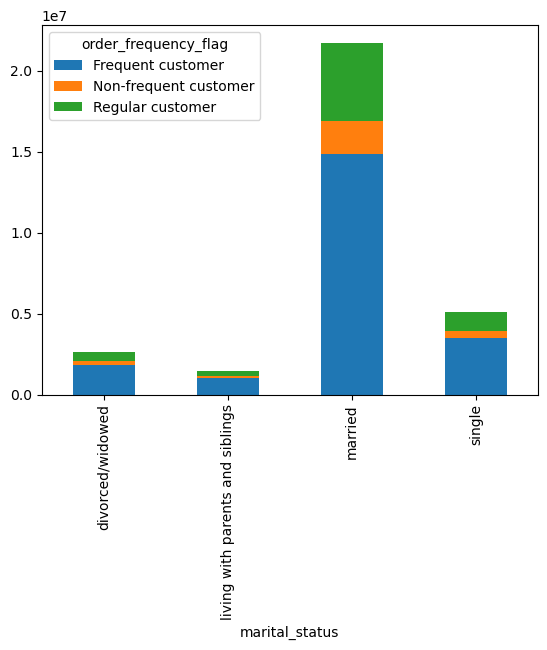

In [90]:
# Region Price Range Bar Chart
bar9 = marital_freq.plot(kind='bar', stacked =True)

In [93]:
# Exporting bar chart
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

In [92]:
# export dataframe 
df2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_final.pkl')) 

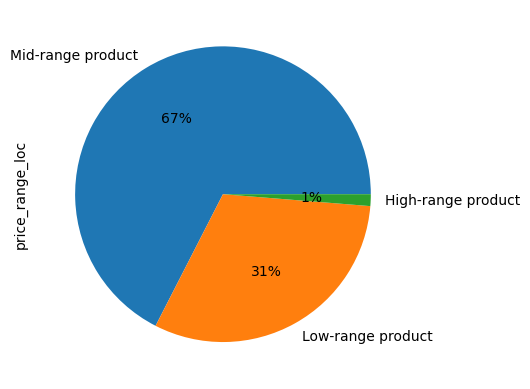

In [95]:
pie = df2['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

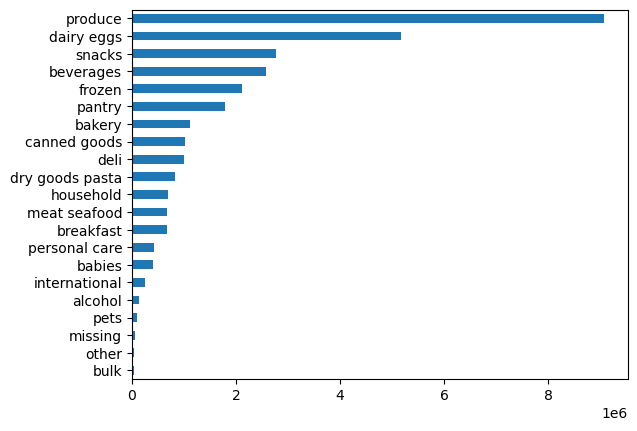

In [96]:

Bar =df2.department.value_counts().sort_values().plot(kind = 'barh')

In [98]:
dep_freq = pd.crosstab(df2['department'], df2['order_frequency_flag'], dropna = False)

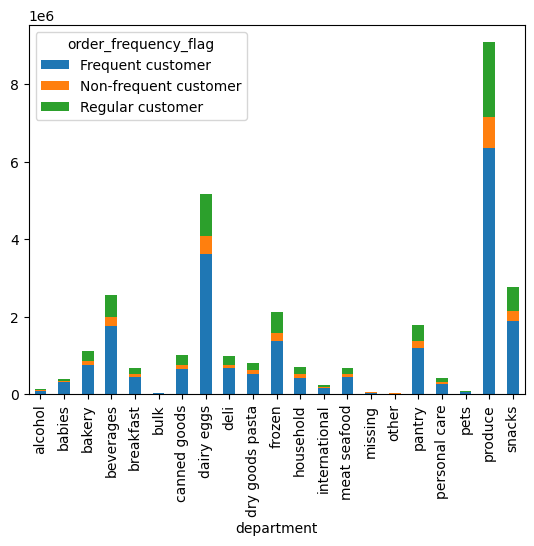

In [99]:
bar = dep_freq.plot(kind='bar', stacked =True)